#### 1. Generate 50 2D data points using the following function: 
$$y = 0.4345x^3 -5.607x^2 +16.78x -10.61$$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg

# Define a function that returns our original function points
def actual_distribution():
    # create x coordinates in interval [0,9), with increment 0.2
    x = np.arange(0,9,0.2);
    # create y coordinates according to given function
    y = 0.4345*np.power(x,3) - 5.607*np.power(x,2) + 16.78*x - 10.61
    return x,y

#### 2. Add Gaussian random noise to the data.

In [17]:
# Define a function that madds noise y-values of our original function
def add_noise(y_curve, mu, sigma):
    # Create a normal distribution of noisy values corresponding to y values
    noise = np.random.normal(mu,sigma, len(y_curve))
    # Create new y values by adding noise 
    y_noise = y_curve + noise
    return y_noise

#### 3. Fit the generated noisy data using the least squares method based on a polynomial function. You must write two versions of the least squares solution:


a. $\overline{w} = (\bf{X}^T\bf{X})^{-1} \bf{X}^T \bar{t} $ <br>


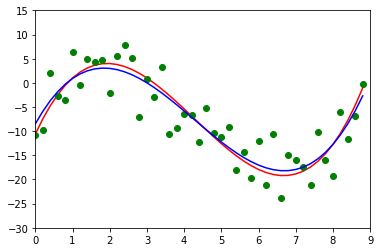

In [18]:
# Set constant variables:
# x: the NX1 vector of original x-values
x = actual_distribution()[0]
N = len(x)
# y: the Nx1 vector of original y-values
y = actual_distribution()[1]
# t_bar: the Nx1 vector with our ground truth (noisy y-values)
t_bar = add_noise(actual_distribution()[1], 0, 4)

# Create NxM array of X that takes in input M
def X(x,N,M):
    # Create matrix of powers of x:
    # this is done by repeating the vector (0,...,M-1) N times, giving us a NxM matrix
    powersMat = np.tile(np.arange(M),(N,1))
    # Create our X matrix by repeating the x vector M times,
    # then transposing it to get an NxM matrix.
    # Then take the powers according to powersMat elementwise.
    X = np.power(np.transpose(np.tile(x,(M,1))), powersMat)
    return(X)

def least_sq_v1(X,M,N,t_bar,x):
    # Calculate the pseudo inverse
    pseudo_inv = np.dot(np.linalg.inv(np.dot(np.transpose(X),X)) , np.transpose(X))
    # Calculate w_bar by multiplying the pseudo inverse with t_bar
    w_bar = np.dot(pseudo_inv,t_bar)
    # Create our vector x locally
    x_local = x
    # Create the y_bar vector and add in the respective w_i terms
    y_bar = np.zeros(N)
    for i in range(M):
        y_bar += w_bar[i]*np.power(x_local,i)
    return y_bar, w_bar


# Actual curve plotted in red line
plt.plot(x, actual_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
plt.axis([0,9,-30,15])
# Estimated curve with M = 4 
plt.plot(x, least_sq_v1(X(x,N,4),4,N, t_bar,x)[0], "b")


b. $\overline{w} = (\bf{X}^+ \bar{t})$, or using numpy's pinv function



In [19]:
def least_sq_v2(X,M,N,t_bar,x):
     # Calculate the pseudo inverse
    pseudo_inv = np.linalg.pinv(X)
    # Calculate w_bar by multiplying the pseudo inverse with t_bar
    w_bar = np.dot(pseudo_inv, t_bar)
    x_local = x
    # create predicted y values according to given function
    y_bar = np.zeros(N)
    for i in range(M):
        y_bar += w_bar[i]*np.power(x_local,i)
    return y_bar, w_bar

#### 4. Show the original curve line, the noisy data, and the curve line estimated from the noisy data

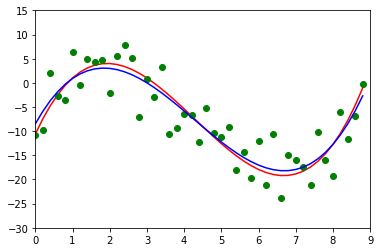

In [20]:
# Actual curve plotted in red line
plt.plot(actual_distribution()[0], actual_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
# Set axis
plt.axis([0,9,-30,15])
# Plot estimated curve line in blue using the second least squares method defined
plt.plot(x, least_sq_v2(X(x,N,4),4, N, t_bar,x)[0], "b")

#### 5. Compute and display the error value, E(w).

In [40]:
# Fix y_bar by using the least squares method for for M = 4
y_bar = least_sq_v2(X(x,N,4),4, N, t_bar,x)[0]

# Find the error 
def Error(y_bar, t_bar):
    return 0.5*np.dot(np.transpose(y_bar - t_bar), (y_bar - t_bar))
print("Error for M = 4: " + str(round(Error(y_bar,t_bar), 3)))

Error for M = 4: 357.722


#### Display the estimated values of w.

In [22]:
w_bar = least_sq_v2(X(x,N,4),4, N, t_bar,x)[1]
for i,w in enumerate(reversed(w_bar)):
    print("w_" + str(i) + " = " + str(round(w, 3)))

w_0 = 0.372
w_1 = -4.77
w_2 = 13.786
w_3 = -8.483


#### 6. Experiment with your code by changing M to various values. Plot the values of M against those of E(w), meaning: project them onto a 2D space, where the x-axis is M and the y-axis is E(w). Try to understand the cases of underfitting and overfitting, and how they relate to the error value, E(w).

Error for M = 4: 327.849


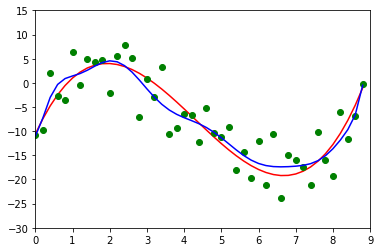

In [39]:
# M = 13: Results in overfitting (shape doesn't follow our original degree 4 curve)

# Actual curve plotted in red line
plt.plot(actual_distribution()[0], actual_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
# Set axis
plt.axis([0,9,-30,15])
# Plot estimated curve line in blue using the second least squares method defined
plt.plot(x, least_sq_v2(X(x,N,13),13, N, t_bar,x)[0], "b")

# Error for M = 13 is slightly less than for M = 4
y_bar_m13 = least_sq_v2(X(x,N,13),13, N, t_bar,x)[0]
print("Error for M = 13: " + str(round(Error(y_bar_m13,t_bar), 3)))

Error for M = 3: 946.041


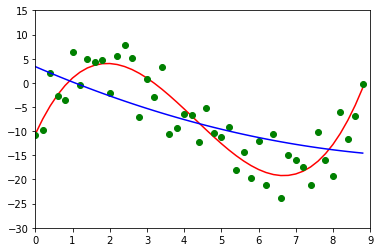

In [41]:
# M = 3: Results in underfitting (not enough stationary points to fit our original model)

# Actual curve plotted in red line
plt.plot(actual_distribution()[0], actual_distribution()[1], "r")
# Noisy values plotted in green points
plt.plot(x, t_bar, "go")
# Set axis
plt.axis([0,9,-30,15])
# Plot estimated curve line in blue using the second least squares method defined
plt.plot(x, least_sq_v2(X(x,N,3),3, N, t_bar,x)[0], "b")

# Error for M = 3 is significantly higher than for M = 4
y_bar_m3 = least_sq_v2(X(x,N,3),3, N, t_bar,x)[0]
print("Error for M = 3: " + str(round(Error(y_bar_m3,t_bar), 3)))

[0, 13, 0, 5000]

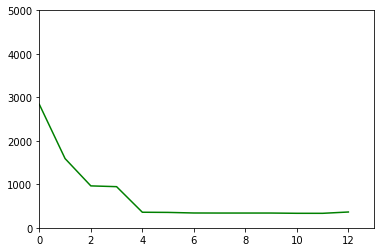

In [45]:
# Plot M against Error: Error decreases after M = 4, remaining roughly constant (and then increase afterwards
# because of numerical instability) 
# Overall, it remains constant at around 300 after stabilising

M_arr = []
Error_arr = []
for i in range(13):
    M_arr.append(i)
    y_bar = least_sq_v1(X(x,N,i),i, N, t_bar,x)[0]
    Error_arr.append(Error(y_bar, t_bar))
plt.plot(M_arr, Error_arr, "g")
plt.axis([0,13,0, 5000])

#### 8. Change the noise levels, and apply the the same operations above.

Error for M = 4: 1802.072


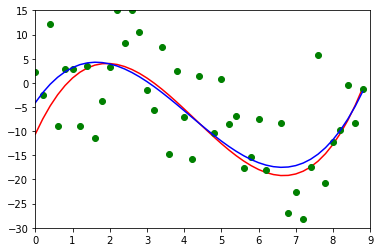

In [50]:
# Plot curve with higher noise levels, M = 4
# The shape is not as accurate of a fit

t_bar_2 = add_noise(actual_distribution()[1], 0, 10)
# Actual curve plotted in red line
plt.plot(x, y, "r")
# Noisy values plotted in green points
plt.plot(x, t_bar_2, "go")
# Set axis
plt.axis([0,9,-30,15])
y_bar_noise = least_sq_v2(X(x,N,4),4,N, t_bar_2,x)[0]

# Plot estimated curve line in blue using the second least squares method defined
plt.plot(x, least_sq_v2(X(x,N,4),4,N, t_bar_2,x)[0], "b")

# Error is significantly higher than for M = 4 with our original noise levels
print("Error for M = 4: " + str(round(Error(y_bar_noise,t_bar_2), 3)))

Error for M = 4: 2307.616


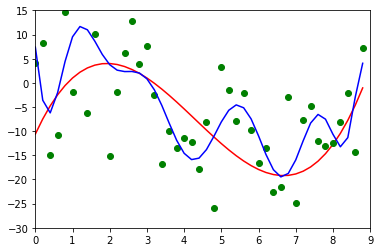

In [51]:
# Plot curve with higher noise levels, M = 13
# The overfitting deviates even further from our original shape

t_bar_2 = add_noise(actual_distribution()[1], 0, 10)
# Actual curve plotted in red line
plt.plot(x, y, "r")
# Noisy values plotted in green points
plt.plot(x, t_bar_2, "go")
# Set axis
plt.axis([0,9,-30,15])

y_bar_noise_m13 = least_sq_v2(X(x,N,4),4,N, t_bar_2,x)[0]

# Plot estimated curve line in blue using the second least squares method defined
plt.plot(x, least_sq_v2(X(x,N,13),13,N, t_bar_2,x)[0], "b")

# Error is significantly higher than for M = 13 with our original noise levels
print("Error for M = 4: " + str(round(Error(y_bar_noise_m13,t_bar_2), 3)))

Error for M = 4: 2622.436


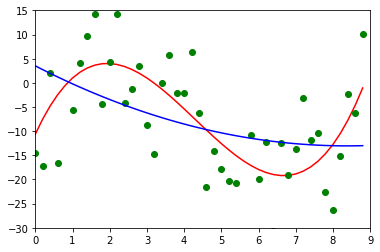

In [52]:
# Plot curve with higher noise levels, M = 3
# Underfitting still occurs, but again, with less accuracy 

t_bar_2 = add_noise(actual_distribution()[1], 0, 10)
# Actual curve plotted in red line
plt.plot(x, y, "r")
# Noisy values plotted in green points
plt.plot(x, t_bar_2, "go")
# Set axis
plt.axis([0,9,-30,15])
# Plot estimated curve line in blue using the second least squares method defined
plt.plot(x, least_sq_v2(X(x,N,3),3,N, t_bar_2,x)[0], "b")

y_bar_noise_m3 = least_sq_v2(X(x,N,3),3,N, t_bar_2,x)[0]

# Error is significantly higher than for M = 3 with our original noise levels
print("Error for M = 4: " + str(round(Error(y_bar_noise_m3,t_bar_2), 3)))

[0, 13, 0, 5000]

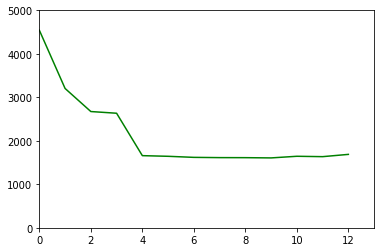

In [53]:
# Plot M against Error for higher noise levels: Error decreases after M = 4, remaining roughly constant (and then increase afterwards
# because of numerical instability)
# Overall, the error stabilises at around 2000, which is significantly 
# higher than for our original noise level

M_arr = []
Error_arr = []
for i in range(13):
    M_arr.append(i)
    y_bar = least_sq_v1(X(x,N,i),i, N, t_bar,x)[0]
    Error_arr.append(Error(y_bar, t_bar_2))
plt.plot(M_arr, Error_arr, "g")
plt.axis([0,13,0,5000])

#### 9. Change the function for generating the data to:  $y = sin(x^2 +1)$, and apply the same operations as above.


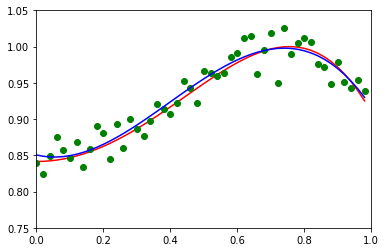

In [65]:
# Define a function that returns our new function points
def new_distribution():
    # create x coordinates in interval [0,1), with increment 0.02
    x = np.arange(0,1,0.02);
    # create y coordinates according to given function
    y = np.sin(np.power(x,2) + 1)
    return x,y

# Set constant variables:
# x: the NX1 vector of original x-values
x_new = new_distribution()[0]
N_new = len(x_new)
# y: the Nx1 vector of original y-values
y_new = new_distribution()[1]
# t_bar: the Nx1 vector with our ground truth (noisy y-values)
t_bar_new = add_noise(y_new, 0, 0.02)

# Actual curve plotted in red line
plt.plot(x_new, y_new, "r")
# Noisy values plotted in green points
plt.plot(x_new, t_bar_new, "go")
plt.axis([0,1,0.75,1.05])
# Estimated curve with M = 4 
plt.plot(x_new, least_sq_v1(X(x_new,N_new,4),4,N_new, t_bar_new, x_new)[0], "b")

w_0 = -0.929
w_1 = 1.106
w_2 = -0.111
w_3 = 0.85
Error for M = 4: 0.008


[0, 10, 0, 0.1]

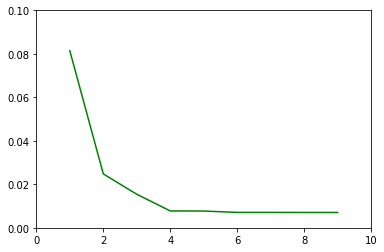

In [75]:
w_bar_new = least_sq_v1(X(x_new,N_new,4),4,N_new, t_bar_new, x_new)[1]
for i,w in enumerate(reversed(w_bar_new)):
    print("w_" + str(i) + " = " + str(round(w, 3)))
    
y_bar_new = least_sq_v1(X(x_new,N_new,4),4,N_new, t_bar_new, x_new)[0]

print("Error for M = 4: " + str(round(Error(y_bar_new,t_bar_new), 3)))

# Plot M against Error: Error decreases dramatically after M = 4
M_arr_new = []
Error_arr_new = []
for i in range(1,10):
    M_arr_new.append(i)
    y_bar_new = least_sq_v1(X(x_new,N_new,i),i,N_new, t_bar_new, x_new)[0]
    Error_arr_new.append(Error(y_bar_new, t_bar_new))
    
plt.plot(M_arr_new, Error_arr_new, "g")
plt.axis([0,10,0,0.1])

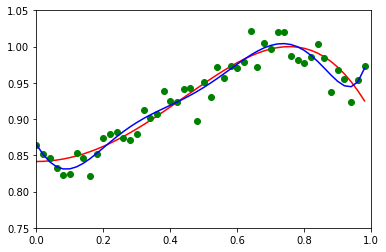

In [13]:
# Plot with M = 10: We observe overfitting beginning to occur

# Actual curve plotted in red line
plt.plot(x_new, y_new, "r")
# Noisy values plotted in green points
plt.plot(x_new, t_bar_new, "go")
plt.axis([0,1,0.75,1.05])
# Estimated curve with M = 4 
plt.plot(x_new, least_sq_v1(X(x_new,N_new,10),10,N_new, t_bar_new, x_new)[0], "b")

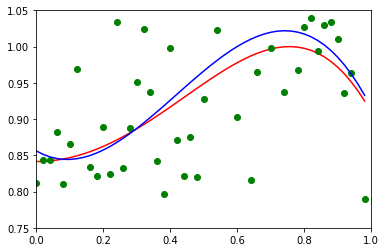

In [73]:
# Plot with M = 4, but with higher noise levels

t_bar_new_2 = add_noise(y_new, 0, 0.1)
# Actual curve plotted in red line
plt.plot(x_new, y_new, "r")
# Noisy values plotted in green points
plt.plot(x_new, t_bar_new_2, "go")
# Set axis
plt.axis([0,1,0.75,1.05])
# Plot estimated curve line in blue using the second least squares method defined
plt.plot(x_new, least_sq_v1(X(x_new,N_new,4),4,N_new, t_bar_new_2, x_new)[0], "b")

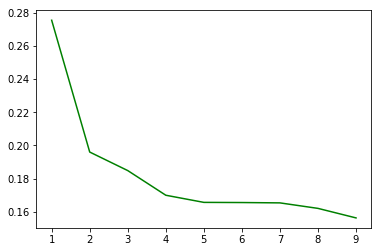

In [78]:
# Plot M against Error: Error decreases dramatically after M = 4
M_arr_new = []
Error_arr_new = []
for i in range(1,10):
    M_arr_new.append(i)
    y_bar_new = least_sq_v1(X(x_new,N_new,i),i,N_new, t_bar_new_2, x_new)[0]
    Error_arr_new.append(Error(y_bar_new, t_bar_new_2))
    
# The error also decreases dramaticaly when m is greater than or equal to 4, but overall
# the error is much higher compared to before adding more noise (maximum is 0.28 compared 
# 0.08 previously, and stabilises at around 0.17 compared to 0.01)
plt.plot(M_arr_new, Error_arr_new, "g")
